# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='/home/ubuntu/projects/continuous_actions_rl/Reacher_Linux_NoVis/Reacher.x86_64')
#env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
"""env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.all(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
env.close()"""

"env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (for each agent)\n    states = next_states                               # roll over states to next time

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
import torch
def saveTrainedModel(agent, path):
    state_dicts = {'model_critic': agent.critic_local.state_dict(), 
                   'model_actor': agent.actor_local.state_dict()}
    torch.save(state_dicts, path)

In [7]:
from DDPG_agent import DDPG_Agent

In [8]:
model_dir = 'saved_models/'
model_name = 'unity_continuous_rl_AWS_' + str(num_agents) + '_agents.pt'

agent = DDPG_Agent(state_size, action_size, num_agents=num_agents)

In [1]:
import torch
print(torch.__version__)

0.4.0


In [9]:
def DDPG_train(n_episodes=1000, i_episode=1, eps_start=1.0, eps_end=0.05, eps_decay=0.99):
    """DDPG_train.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        i_episode (int): starting episode
    """
    
    scores_history = []                                           # for plotting graph
    eps = eps_start                                               # start of eps noise factor
    
    while i_episode < n_episodes + 1:
        
        agent.reset()                                             # reset the agent for noise
        env_info = env.reset(train_mode=True)[brain_name]         # reset the environment  
        states = env_info.vector_observations                     # get the current state (for each agent)
        epi_scores = np.zeros(num_agents)                         # initialize the score (for each agent)

        episode_running = True                                    # flag for breaking the loop
        while episode_running:
            actions = agent.act(states, 1.0)                      # select an action (for each agent)
            #n_actions = actions.detach().cpu().numpy()           # to numpy
            actions = np.clip(actions, -1, 1)                     # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]              # send all actions to tne environment
            next_states = env_info.vector_observations            # get next state (for each agent)
            rewards = env_info.rewards                            # get reward (for each agent)
            dones = env_info.local_done                           # see if episode finished
            epi_scores += env_info.rewards                        # update the score (for each agent)

            agent.step(states,actions,rewards,next_states,dones)  # agent to update with env info
            
            states = next_states                                  # roll over states to next time step
            if np.any(dones):                                     # exit loop if ANY episode finished
                episode_running = False               

        if agent.is_training == True:        
            scores_history.append(np.mean(epi_scores))             # append episodic avg score to history
            print('Episode: {}  Avg score(#{}): {:.2f}  steps: {}  Actor G: {:.2f}  '
                  'Critic L: {:1.2e}  noise: {:.2f}  eps: {:.2f}'.format(i_episode, num_agents, 
                                                                         np.mean(epi_scores),
                                                                         agent.t_step, 
                                                                         agent.getQAvg(), 
                                                                         agent.get_td_avg(), 
                                                                         agent.get_noise_avg(),
                                                                         eps))

            if len(scores_history) >=100 and np.mean(scores_history[-100:]) >= 30.:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100,
                                                                                             np.mean(scores_history)))

                saveTrainedModel(agent, model_dir + model_name)
                break

            i_episode += 1                                         # episode increment
            eps = max(eps*eps_decay,eps_end)                       # min of eps
        else:                                                      # training not yet started
            print('\rFetching experiences... {} '.format(len(agent.memory.memory)), end="")

    env.close()
        
    return scores_history

scores = DDPG_train(500)

Fetching experiences... 180180 
Prefetch completed. Training starts! 
Number of Agents:  20
Device:  cuda:0
Episode: 1  Avg score(#20): 0.75  steps: 10010  Actor G: -0.07  Critic L: 3.12e-05  noise: 0.34  eps: 1.00
Episode: 2  Avg score(#20): 0.67  steps: 11011  Actor G: -0.07  Critic L: 1.49e-05  noise: 0.33  eps: 0.99
Episode: 3  Avg score(#20): 0.54  steps: 12012  Actor G: -0.07  Critic L: 1.48e-05  noise: 0.33  eps: 0.98
Episode: 4  Avg score(#20): 0.51  steps: 13013  Actor G: -0.07  Critic L: 1.47e-05  noise: 0.33  eps: 0.97
Episode: 5  Avg score(#20): 0.93  steps: 14014  Actor G: -0.07  Critic L: 1.47e-05  noise: 0.32  eps: 0.96
Episode: 6  Avg score(#20): 0.85  steps: 15015  Actor G: -0.06  Critic L: 1.57e-05  noise: 0.32  eps: 0.95
Episode: 7  Avg score(#20): 1.63  steps: 16016  Actor G: -0.06  Critic L: 1.73e-05  noise: 0.32  eps: 0.94
Episode: 8  Avg score(#20): 1.83  steps: 17017  Actor G: -0.06  Critic L: 1.82e-05  noise: 0.32  eps: 0.93
Episode: 9  Avg score(#20): 1.62  st

Episode: 76  Avg score(#20): 39.46  steps: 85085  Actor G: 1.24  Critic L: 1.99e-03  noise: 0.16  eps: 0.47
Episode: 77  Avg score(#20): 39.48  steps: 86086  Actor G: 1.26  Critic L: 1.90e-03  noise: 0.16  eps: 0.47
Episode: 78  Avg score(#20): 39.53  steps: 87087  Actor G: 1.28  Critic L: 1.97e-03  noise: 0.16  eps: 0.46
Episode: 79  Avg score(#20): 39.47  steps: 88088  Actor G: 1.30  Critic L: 1.83e-03  noise: 0.15  eps: 0.46
Episode: 80  Avg score(#20): 39.24  steps: 89089  Actor G: 1.32  Critic L: 1.67e-03  noise: 0.15  eps: 0.45
Episode: 81  Avg score(#20): 39.22  steps: 90090  Actor G: 1.34  Critic L: 1.83e-03  noise: 0.15  eps: 0.45
Episode: 82  Avg score(#20): 39.30  steps: 91091  Actor G: 1.36  Critic L: 1.99e-03  noise: 0.15  eps: 0.44
Episode: 83  Avg score(#20): 39.08  steps: 92092  Actor G: 1.38  Critic L: 1.89e-03  noise: 0.15  eps: 0.44
Episode: 84  Avg score(#20): 37.98  steps: 93093  Actor G: 1.39  Critic L: 1.94e-03  noise: 0.15  eps: 0.43
Episode: 85  Avg score(#20):

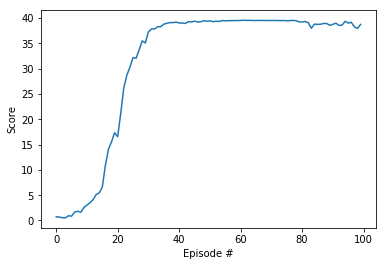

In [10]:
# plot the scores
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()